# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 -  A simple cost function
### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [5]:
#Make Data
x_1 = np.linspace(start=-3, stop = 3, num=500)

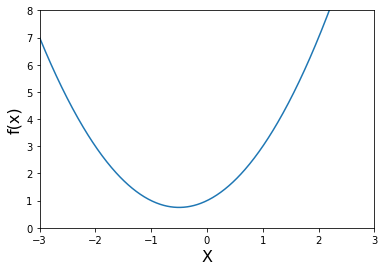

In [9]:
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show()